### **Regression using numpy (with pandas and pyplot)**

<font color="red">File access required:</font> In Colab this notebook requires first uploading files **Cities.csv** and **Players.csv** using the *Files* feature in the left toolbar. If running the notebook on a local computer, simply ensure these files are in the same workspace as the notebook.

In [1]:
# Set-up
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Cities.csv into dataframe
f = open('Cities.csv')
cities = pd.read_csv(f)

In [3]:
cities.columns

Index(['city', 'country', 'latitude', 'longitude', 'temperature'], dtype='str')

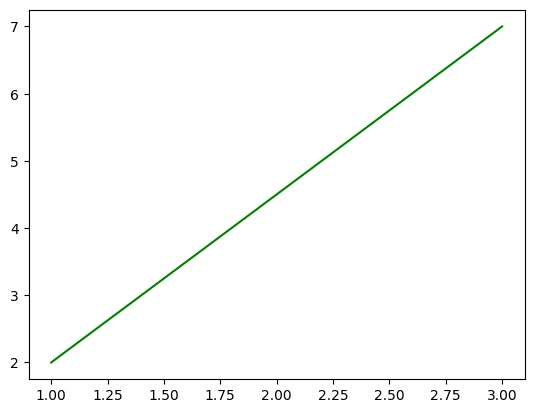

In [4]:
# Introduction to plotting a line
plt.plot([1,3], [2,7], color='green')
plt.show()

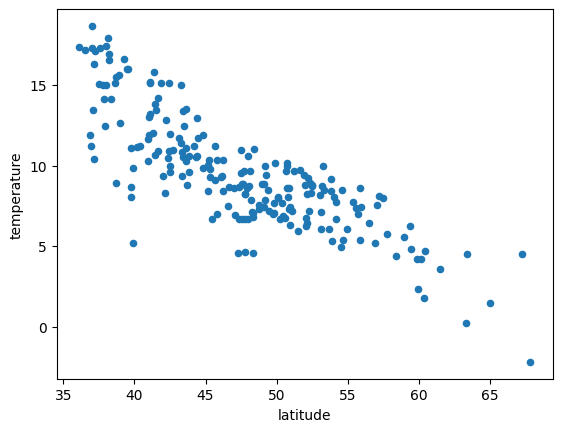

In [5]:
# Recall temperature versus latitude scatterplot
cities.plot.scatter('latitude', 'temperature')
plt.show()

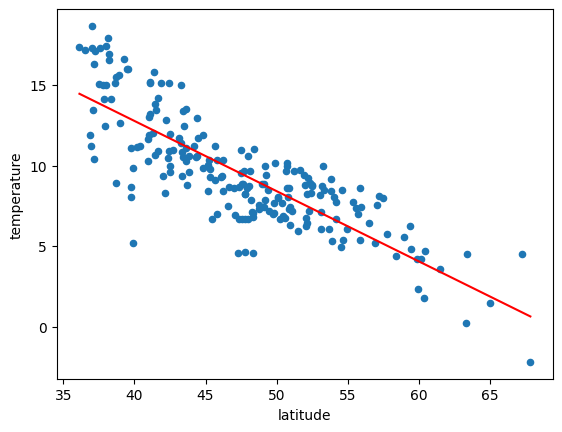

In [6]:
# Add linear regression
cities.plot.scatter('latitude', 'temperature')

a,b = np.polyfit(cities.latitude, cities.temperature, 1) # Regression line is y = mx + b

x1 = min(cities.latitude)
x2 = max(cities.latitude)

plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()

In [7]:
# Correlation coefficients (r values)
r = np.corrcoef(cities.latitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus latitude:', r)

r = np.corrcoef(cities.longitude, cities.temperature)[1,0]
print('Correlation coefficient for temperature versus longitude:', r)

Correlation coefficient for temperature versus latitude: -0.8241046320267107
Correlation coefficient for temperature versus longitude: -0.1693075040361786


Training data:


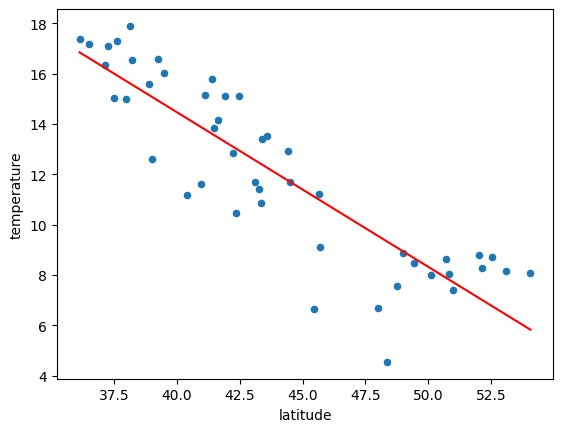

In [11]:
# Use linear regression for interactive temperature predictor
# Training data: compute and show latitude-temperature regression from cities
# in Germany, Spain, and Italy
train = cities[ (cities.country=='Germany') | (cities.country=='Spain') | (cities.country=='Italy')  ]
a,b = np.polyfit(train.latitude, train.temperature, 1) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b
print('Training data:')
train.plot.scatter('latitude', 'temperature')
x1 = min(train.latitude)
x2 = max(train.latitude)
plt.plot([x1,x2], [a*x1 + b, a*x2 + b], color='red')
plt.show()


In [9]:
train.head()

,city,country,latitude,longitude,temperature
4,Albacete,Spain,39.00,-1.87,12.62
5,Algeciras,Spain,36.13,-5.47,17.38
8,Ancona,Italy,43.60,13.50,13.52
15,Augsburg,Germany,48.35,10.90,4.54
17,Badajoz,Spain,38.88,-6.97,15.61


In [ ]:
# Now loop asking for a city name; find the city's latitude, use the regression
# to predict the temperature, then check against the actual temperature.

while True:
    name = input('Enter city name (or "quit" to quit): ')

    if name == 'quit': break

    city = cities[cities.city == name]
    if len(city) == 0:
        print('City not in dataset')
    else:
        print('Predicted temperature:', a * city.latitude.iloc[0] + b) # y = mx + b = y = ax + b --->>>>> slope: a; intercept: b -> trained from 3 cities only
        print('Actual temperature:', city.temperature.iloc[0])

Predicted temperature: 9.872002987609019
Actual temperature: 10.98


### <font color="green">**Your Turn: World Cup Data**</font>

In [14]:
# Read Players.csv into dataframe
f = open('Players.csv')
players = pd.read_csv(f)

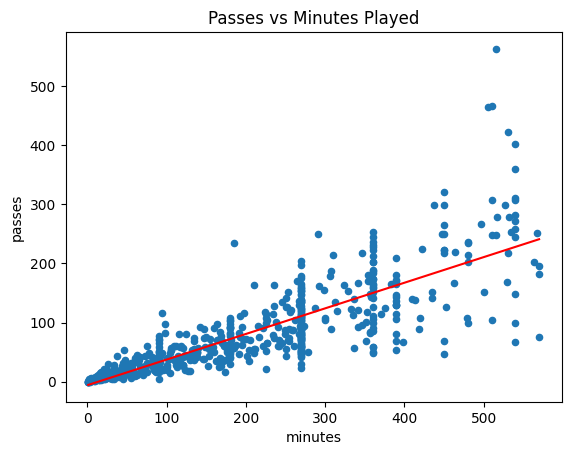

In [15]:
# From the players data, compute and plot a linear regression for
# passes made (y-axis) versus minutes played (x-axis).
a, b = np.polyfit(players.minutes, players.passes, 1)

players.plot.scatter('minutes', 'passes')
x1 = min(players.minutes)
x2 = max(players.minutes)
plt.plot([x1, x2], [a*x1 + b, a*x2 + b], color='red')
plt.title('Passes vs Minutes Played')
plt.show()

In [16]:
# Show the correlation coefficients for four regressions:
# passes versus minutes, tackles versus minutes, shots versus minutes,
# and saves versus minutes. Make sure to label each one.
stats = ['passes', 'tackles', 'shots', 'saves']
for stat in stats:
    r = np.corrcoef(players.minutes, players[stat])[1, 0]
    print(f'Correlation coefficient for {stat} versus minutes: {r:.4f}')

Correlation coefficient for passes versus minutes: 0.8151
Correlation coefficient for tackles versus minutes: 0.6107
Correlation coefficient for shots versus minutes: 0.4079
Correlation coefficient for saves versus minutes: 0.2285


In [17]:
# BONUS!
# Repeat the previous problem, except consider each position separately.
# That is, show correlation coefficients separately for the forwards,
# midfielders, defenders, and goalkeepers. If you get a warning, you
# may hard-code the fact that only goalkeepers make saves.
stats = ['passes', 'tackles', 'shots', 'saves']
for stat in stats:
    r = np.corrcoef(players.minutes, players[stat])[1, 0]
    print(f'Correlation coefficient for {stat} versus minutes: {r:.4f}')

Correlation coefficient for passes versus minutes: 0.8151
Correlation coefficient for tackles versus minutes: 0.6107
Correlation coefficient for shots versus minutes: 0.4079
Correlation coefficient for saves versus minutes: 0.2285


In [18]:
# Use linear regression for interactive number-of-passes predictor
# Training data: compute and show minutes-passes regression for players
# from Greece, USA, and Portugal
stats = ['passes', 'tackles', 'shots', 'saves']
for stat in stats:
    r = np.corrcoef(players.minutes, players[stat])[1, 0]
    print(f'Correlation coefficient for {stat} versus minutes: {r:.4f}')

Correlation coefficient for passes versus minutes: 0.8151
Correlation coefficient for tackles versus minutes: 0.6107
Correlation coefficient for shots versus minutes: 0.4079
Correlation coefficient for saves versus minutes: 0.2285


In [19]:
# Now loop asking for a player's surname; find the number of minutes the
# player played, use the regression to predict the number of passes made,
# then check against the actual number.
#
# Once your predictor seems to be working, try surname Barry, Gomez, or Pepe.
# You probably get an error; figure out the underlying reason for the error,
# then modify your code so it prints a suitable message for surnames like these,
# instead of raising an error.
while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break

    player = players[players.surname == name]
    
    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        # Error handling for multiple players with the same surname
        print(f'Error: Multiple players found with surname "{name}". Please be more specific.')
    else:
        mins = player.minutes.iloc[0]
        actual = player.passes.iloc[0]
        predicted = a * mins + b
        print(f'Minutes played: {mins}')
        print(f'Predicted passes: {predicted:.2f}')
        print(f'Actual passes: {actual}')

Minutes played: 450
Predicted passes: 189.01
Actual passes: 321
Minutes played: 270
Predicted passes: 111.01
Actual passes: 158


In [20]:
# BONUS!
# Repeat previous but use separate predictors for the four different positions
# (forward,midfielder,defender,goalkeeper). Does it do better?
#
# Note: To extract a string value from a dataframe element use df.iloc[0].element,
# e.g., if "player" is a one-row dataframe, then player.iloc[0].position returns
# the player's position as a string
while True:
    name = input('Enter player surname (or "quit" to quit): ')
    if name == 'quit': break

    player = players[players.surname == name]
    
    if len(player) == 0:
        print('Player not in dataset')
    elif len(player) > 1:
        # Error handling for multiple players with the same surname
        print(f'Error: Multiple players found with surname "{name}". Please be more specific.')
    else:
        position = player.iloc[0].position
        mins = player.minutes.iloc[0]
        actual = player.passes.iloc[0]
        predicted = a * mins + b
        print(f'Minutes played: {mins}')
        print(f'Predicted passes: {predicted:.2f}')
        print(f'Actual passes: {actual}')

Minutes played: 450
Predicted passes: 189.01
Actual passes: 321
